## EA run comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

def getMinimizingArray(df, column):
    minsArray = []
    minValue = df[column][0]
    for value in np.array(df[column]):
        if value < minValue:
            minValue = value
        minsArray.append(minValue)    
    return np.array(minsArray)   

def getMinimizingArray2(array1):
    minsArray = []
    minValue = array1[0]
    for value in array1:
        if value < minValue:
            minValue = value
        minsArray.append(minValue)    
    return np.array(minsArray)   

def getMaximizingArray(df, column):
    maxArray = []
    maxValue = df[column][0]
    for value in np.array(df[column]):
        if value > maxValue:
            maxValue = value
        maxArray.append(maxValue)    
    return np.array(maxArray)  

def getMinimisingIslandArray(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
        minsArray.append(minValue)
    return np.array(minsArray)

def getMinimisingIslandArray2(array1, array2, array3, steps):
    arrayLength = min(steps, min(len(array3), min(len(array1), len(array2))))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array3), max(len(array1), len(array2)))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
        if i < len(array3):
            if array3[i] < minValue:
                minValue = array3[i]                
        minsArray.append(minValue)
    return np.array(minsArray)

def getMaximizingIslandArray(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
            minsArray.append(minValue)
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
            minsArray.append(minValue)
    return np.array(minsArray)

def getMinimisingIslandArrayFull(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    minsArray = []
    minValue = array1[0]
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            if array1[i] < minValue:
                minValue = array1[i]
            minsArray.append(minValue)
        if i < len(array2):
            if array2[i] < minValue:
                minValue = array2[i]
            minsArray.append(minValue)
    return np.array(minsArray)

def getIslandArrayFull(array1, array2, steps):
    arrayLength = min(steps, min(len(array1), len(array2)))
    islandArray = []
    for i in range(max(len(array1), len(array2))):
        if i < len(array1):
            islandArray.append(array1[i])
        if i < len(array2):
            islandArray.append(array2[i])
    return np.array(islandArray)

def getIslandArrayFull2(array1, array2, array3, steps):
    arrayLength = min(steps, min(len(array3), min(len(array1), len(array2))))
    islandArray = []
    for i in range(max(len(array3), max(len(array1), len(array2)))):
        if i < len(array1):
            islandArray.append(array1[i])
        if i < len(array2):
            islandArray.append(array2[i])        
        if i < len(array3):
            islandArray.append(array3[i])
    return np.array(islandArray)

## Distinct Methods:

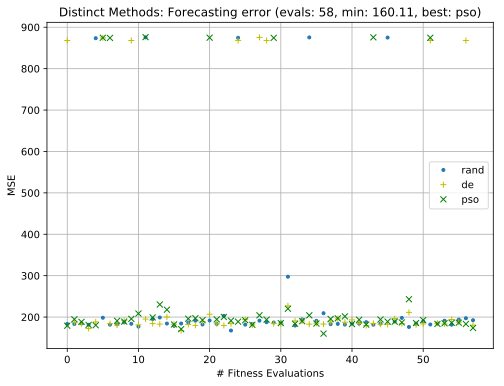

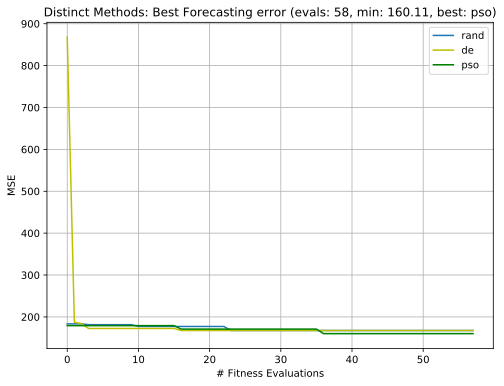

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "distinctMethods"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 58

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 58
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = False
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
    islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArrayFull = getMinimisingIslandArrayFull(psoMseMin, deMseMin, steps)
    islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
    if len(islandArray) > 0:
        island = True    

    minFitness = min(min(islandArray), min(randMseMin))
    minMethod = "rand"
    if min(islandArray) < min(randMseMin):
        minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Distinct Methods: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray, 'ro-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*-');
# ax.legend(["rand", "island de", "island pso", "concurrent islands", "islands"]);
ax.legend(["rand", "de", "pso"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Distinct Methods: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin);
if de:          
    ax.plot(deMseMin, 'y-');
if pso:         
    ax.plot(psoMseMin, 'g-');
# if island:                
#     ax.plot(islandArray, 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull, 'b-');
# ax.legend(["rand", "island de", "island pso", "concurrent islands", "islands"]);
ax.legend(["rand", "de", "pso"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')


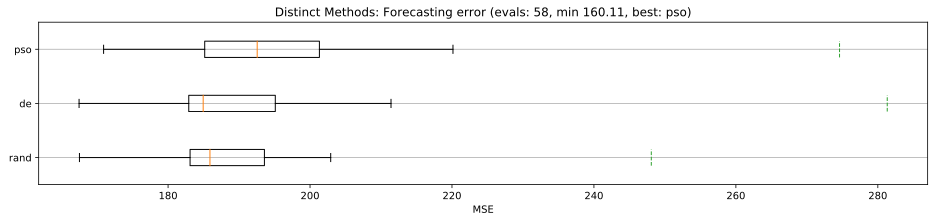

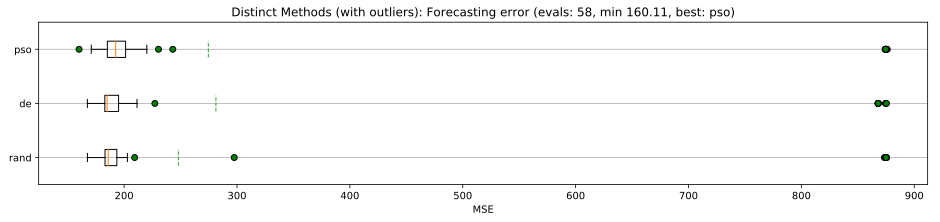

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = False

steps = 58

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))
steps = 58  
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = False

# minMethod = "rand"
# minFitness = min(randMseMin)
# if min(deMseMin) < min(randMseMin):
#     minMethod = "de"      
#     minFitness = min(deMseMin)
# if min(psoMseMin) < min(randMseMin):
#     minMethod = "pso" 
#     minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, steps)
#     islandArrayFull = getMinimisingIslandArrayFull(psoMseMin, deMseMin, steps)
    islandArrayFull = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)    
    if len(islandArray) > 0:
        island = True    

# minFitness = min(min(islandArray), min(randMseMin))
# minMethod = "rand"
# if min(islandArray) < min(randMseMin):
#     minMethod = "islands"
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Distinct Methods: Forecasting error (evals: {}, min {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2[:steps]], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps]], showfliers=False, vert=False, flierprops=red_square, showmeans=True, meanline=True);
# plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
plt.yticks(range(1, 4), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Distinct Methods (with outliers): Forecasting error (evals: {}, min {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2[:steps]], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps]], vert=False, flierprops=red_square, showmeans=True, meanline=True);
# plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
plt.yticks(range(1, 4), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')


## 8 islands

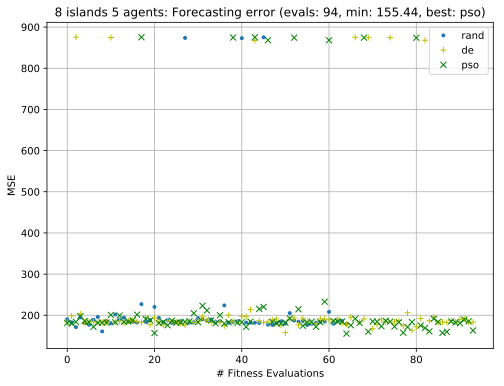

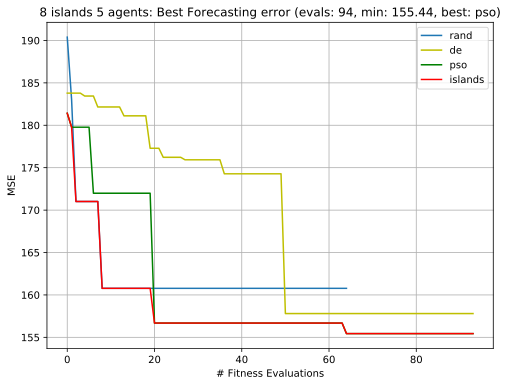

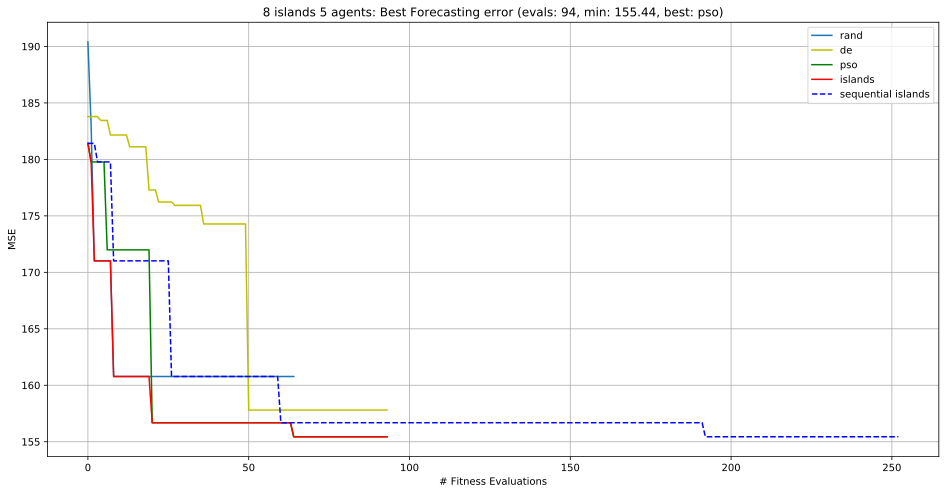

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands8Agents5"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 94

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 94
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 5 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 5 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 5 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


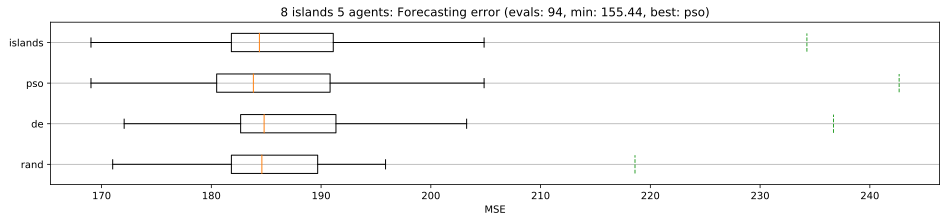

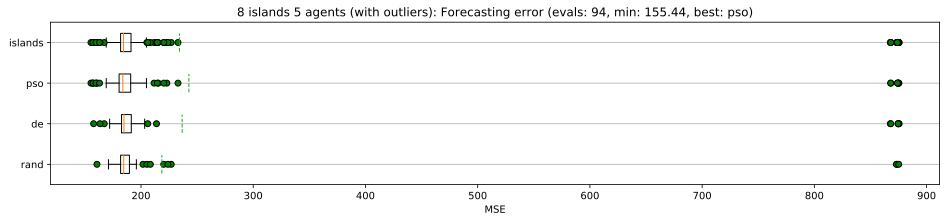

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands8Agents5"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 94

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 94
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('8 islands 5 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('8 islands 5 agents (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')


## 3 islands

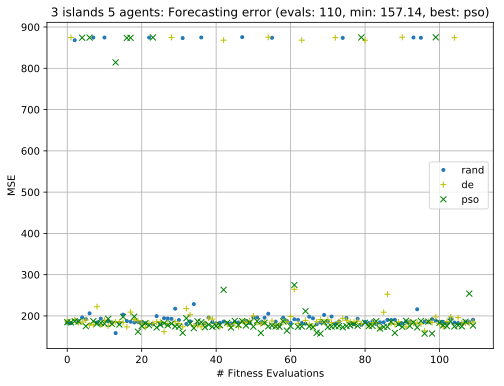

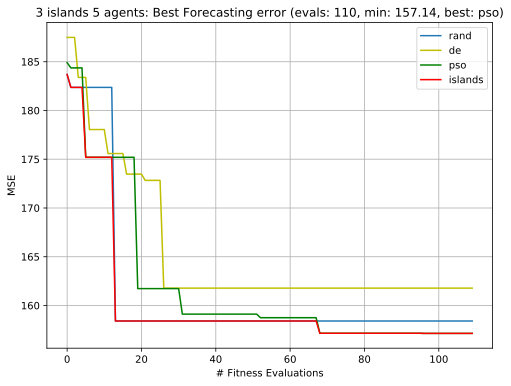

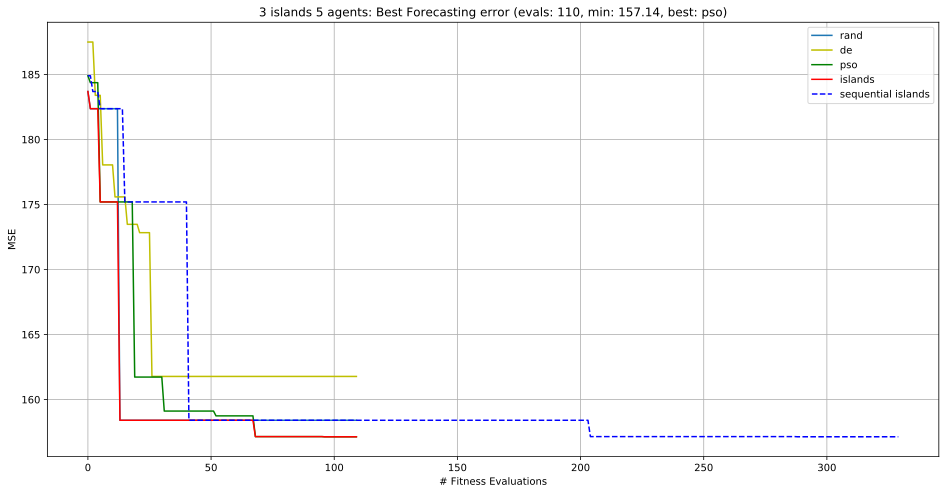

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands3Agents5"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 110

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 110
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 5 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 5 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 5 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


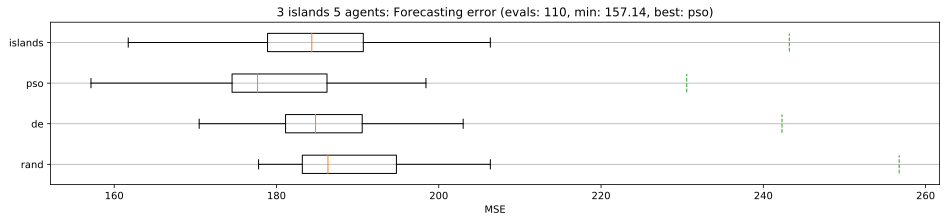

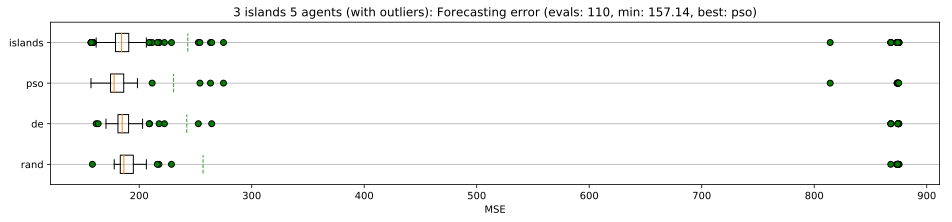

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands3Agents5"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 110

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 110
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('3 islands 5 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('3 islands 5 agents (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')

## 3 islands, 20 agents

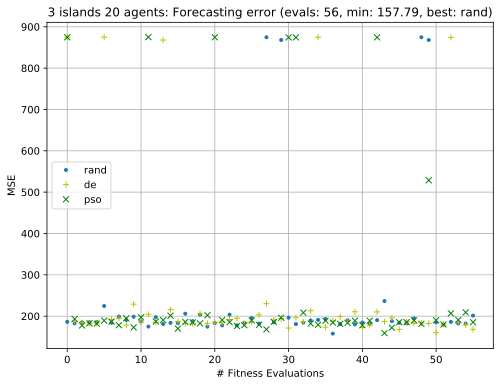

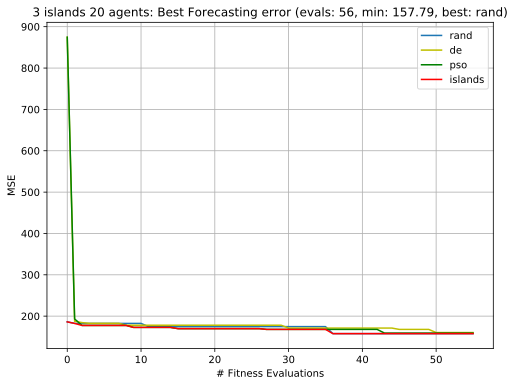

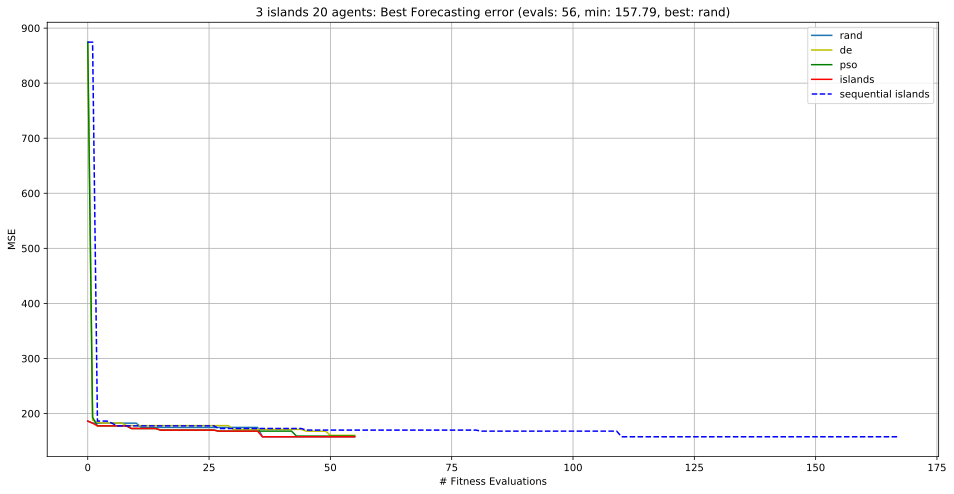

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands3Agents20"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/ga3Islands3Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 56

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 56
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 20 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 20 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('3 islands 20 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


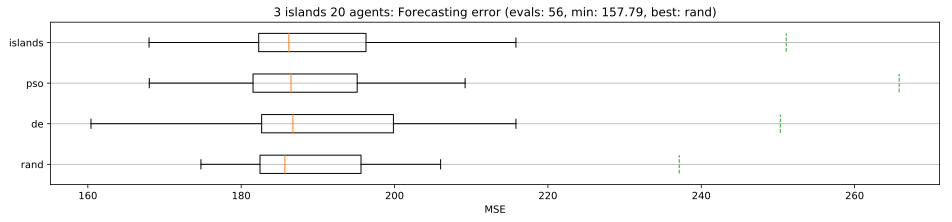

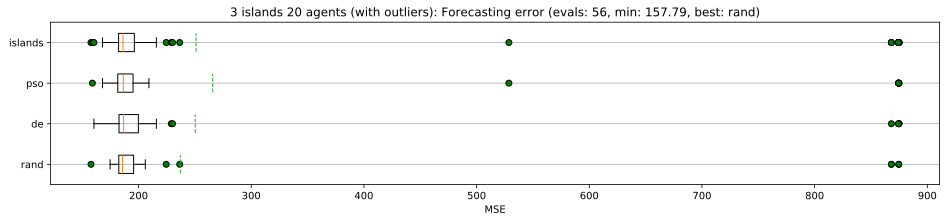

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands3Agents20"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/ga3Islands3Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 56

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 56
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('3 islands 20 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('3 islands 20 agents (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')

## Rand

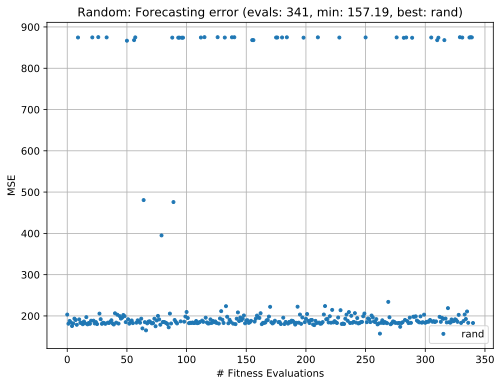

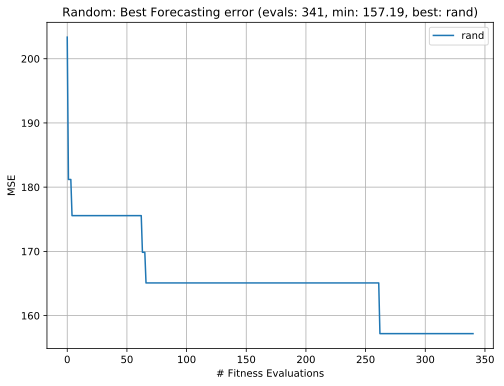

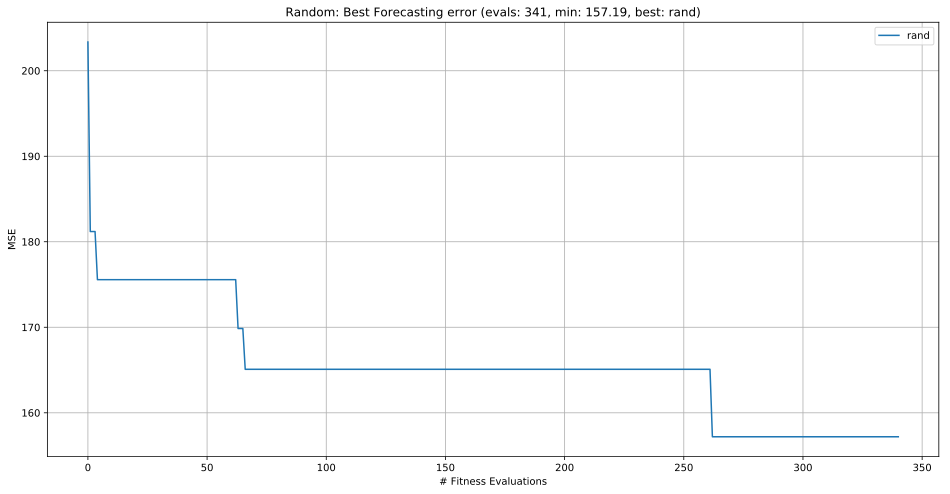

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "rand"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/gaRand/logs/"

rand = True
pso = False
de = False
island = False
concurrent_island = False

# steps = 5000
steps = 341

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 341
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = False
de = False
island = False
concurrent_island = False

minMethod = "rand"
minFitness = min(randMseMin)
# if min(deMseMin) < min(randMseMin):
#     minMethod = "de"      
#     minFitness = min(deMseMin)
# if min(psoMseMin) < min(randMseMin):
#     minMethod = "pso" 
#     minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


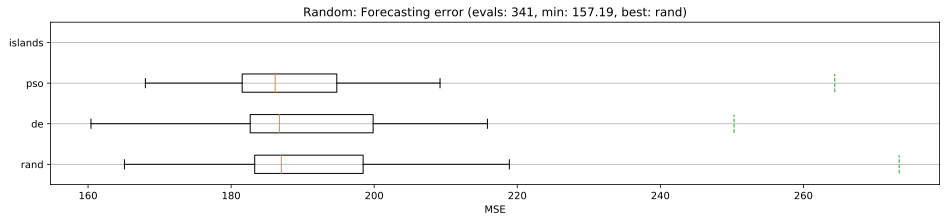

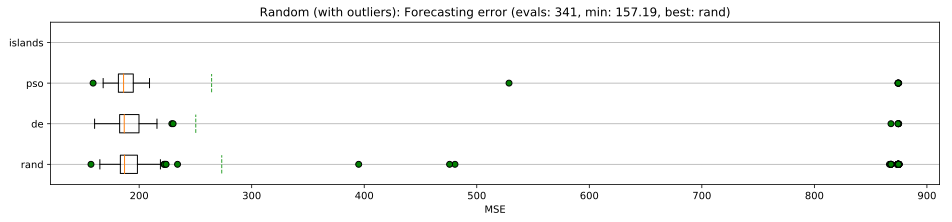

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "rand"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/gaRand/logs/"

# rand = True
# pso = True
# de = True
# island = True
# concurrent_island = True

# steps = 5000
steps = 341

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 341
    
# if rand:
#     randMseMin = getMinimizingArray(randDf.head(steps), column)
# if pso:
#     psoMseMin = getMinimizingArray(psoDf.head(steps), column)
# if de:
#     deMseMin = getMinimizingArray(deDf.head(steps), column)

# rand = True
# pso = True
# de = True
# island = True
# concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
# if min(deMseMin) < min(randMseMin):
#     minMethod = "de"      
#     minFitness = min(deMseMin)
# if min(psoMseMin) < min(randMseMin):
#     minMethod = "pso" 
#     minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')

## 8 islands 10 agents

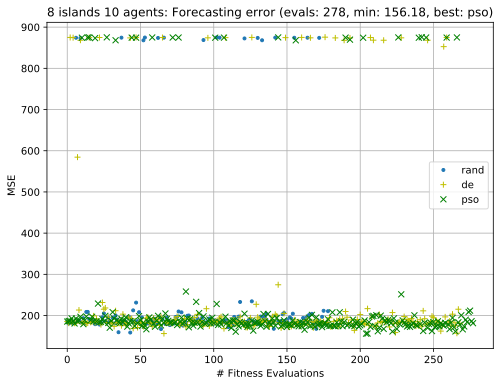

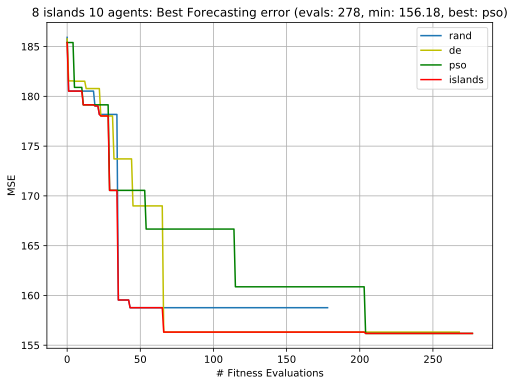

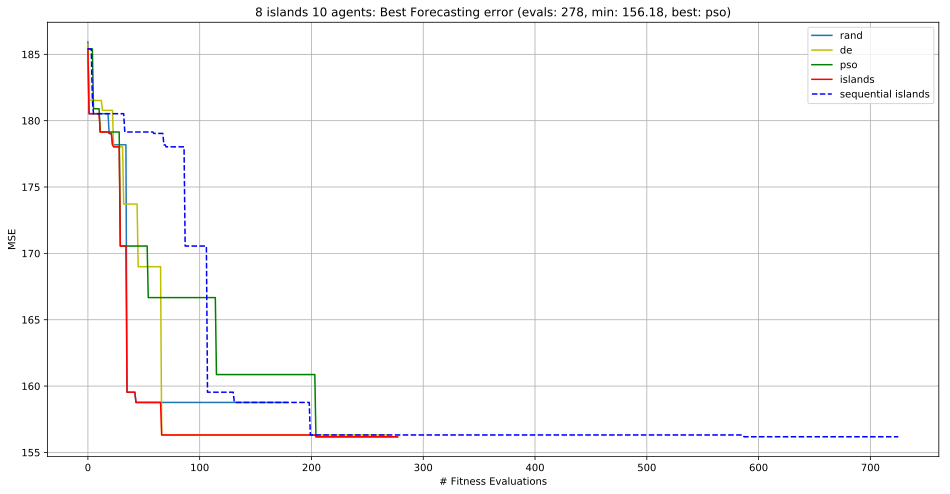

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands8agents10"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/gaIslands8Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 278

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 278
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (16, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 10 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 10 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('8 islands 10 agents: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


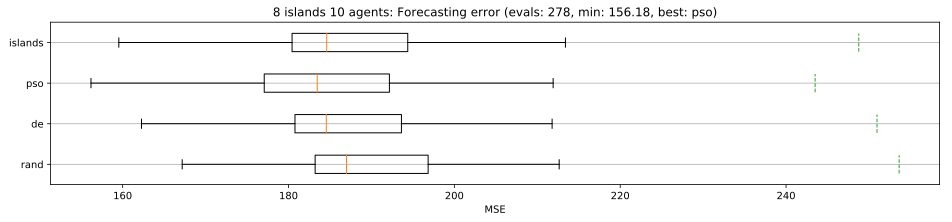

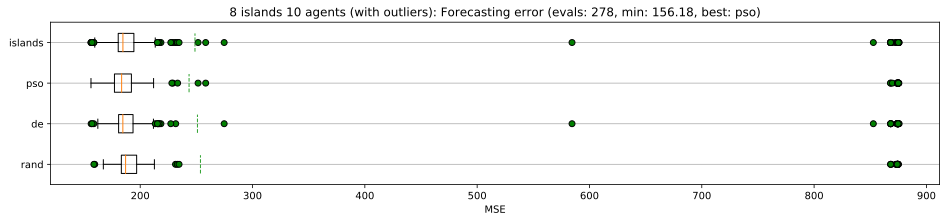

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "islands8agents10"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/gaIslands8Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 278

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 278
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('8 islands 10 agents: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('8 islands 10 agents (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')

## Ozone 24 stations 8 islands 5 agents

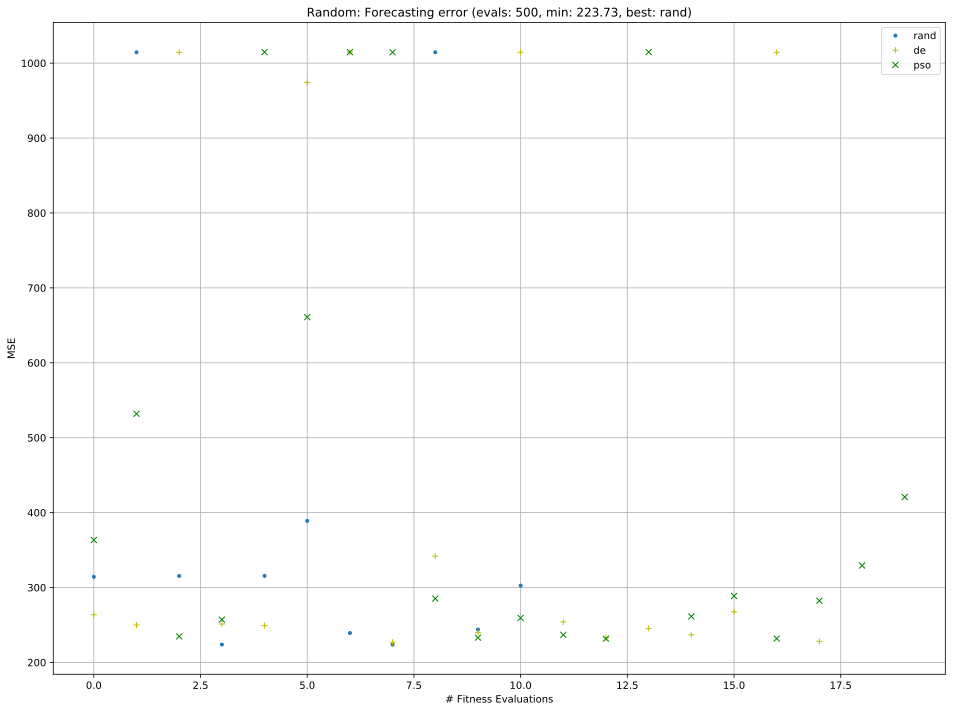

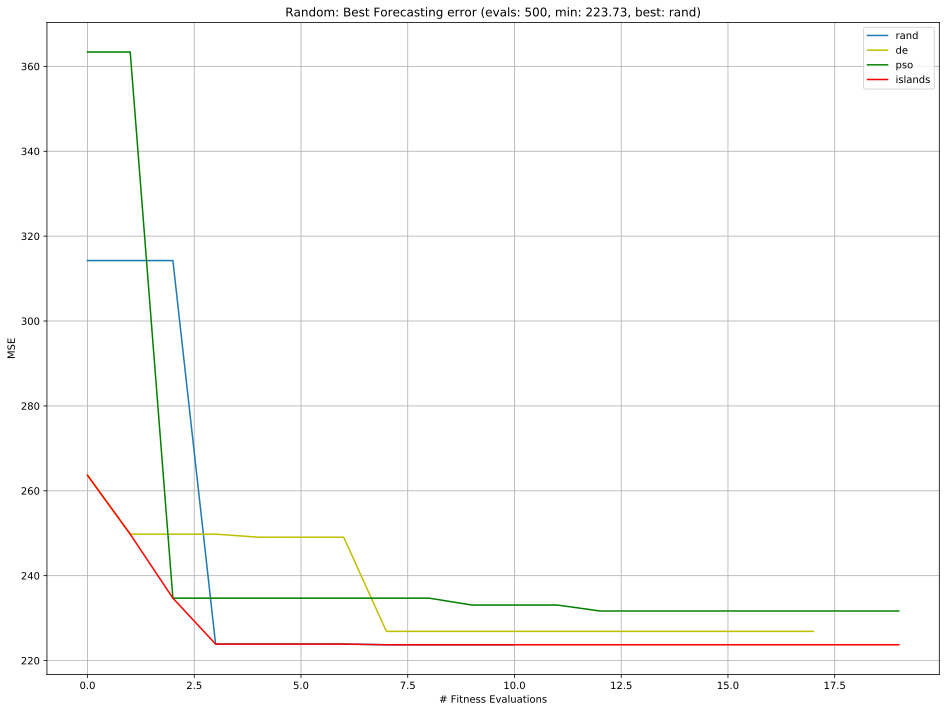

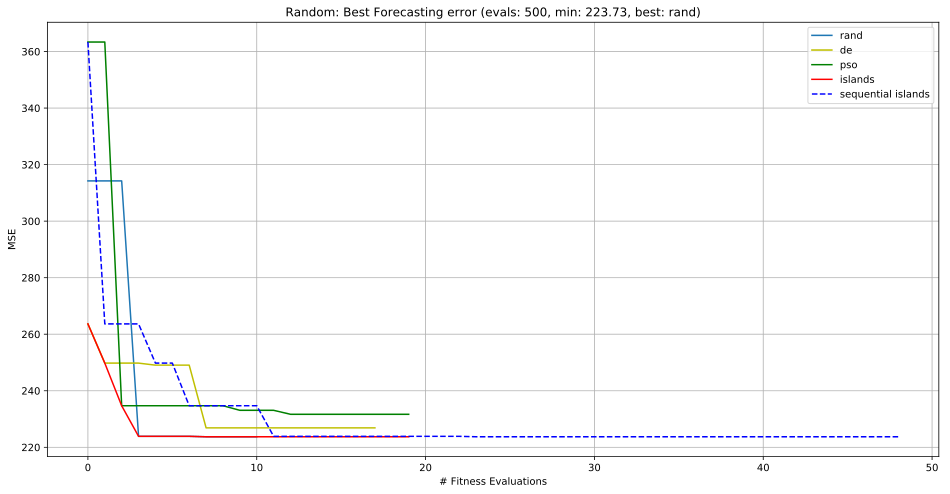

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "current"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
# fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
fpath = "../models/NarxModelSearch/runs/4daysO3BG8islands/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 500

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 500
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
figure_size = (16, 12)
# figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


In [15]:
print(len(randMseMin), len(psoMseMin), len(deMseMin))

11 20 18


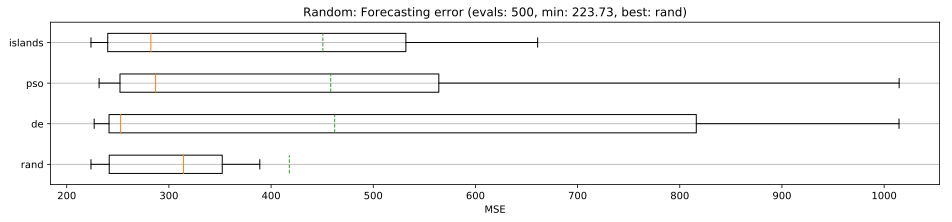

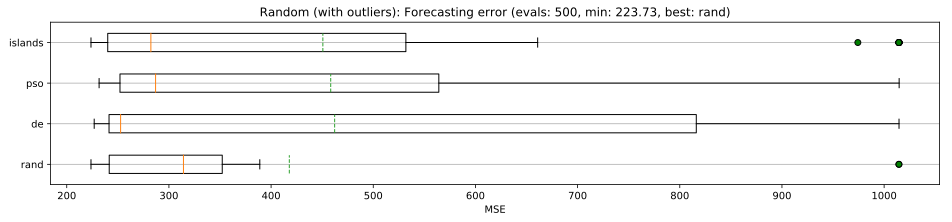

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "current"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
# fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands3Agents20/logs/"
fpath = "../models/NarxModelSearch/runs/4daysO3BG8islands/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 500

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 500
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 6)
figure_size = (16, 3)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')

## Current

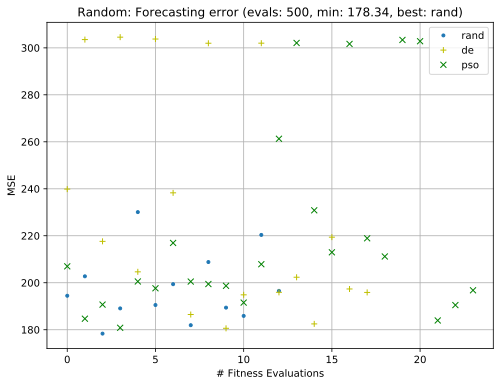

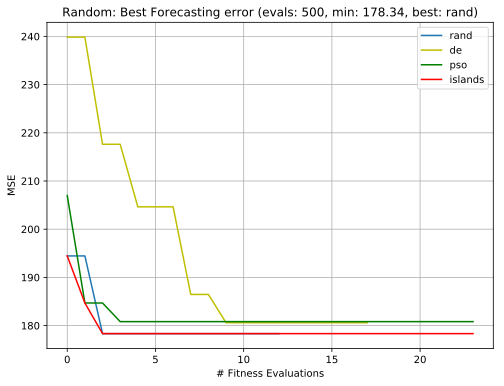

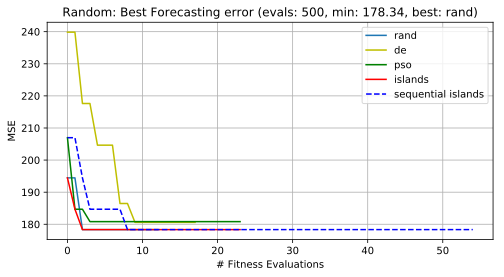

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "current"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands3Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 500

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 500
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
     
        
# figure_size = (8, 12)
figure_size = (8, 6)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randDf[column][:steps], '.');
if de:          
    ax.plot(deDf[column][:steps], 'y+');
if pso:         
    ax.plot(psoDf[column][:steps], 'gx');
# if island:                
#     ax.plot(islandArray[:steps], 'rs');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b*');
# ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'MinError.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
# if concurrent_island:    
#     ax.plot(islandArrayFull2, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'Error.png', bbox_inches='tight')

# fig, ax = plt.subplots(1, 1, figsize=(16, 8))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_ylabel("MSE")
ax.set_xlabel('# Fitness Evaluations')
ax.set_title('Random: Best Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.grid(True)
if rand:                
    ax.plot(randMseMin[:steps]);
if de:          
    ax.plot(deMseMin[:steps], 'y-');
if pso:         
    ax.plot(psoMseMin[:steps], 'g-');
if island:                
    ax.plot(islandArray[:steps], 'r-');
if concurrent_island:    
    ax.plot(islandArrayFull3, 'b--');
ax.legend(["rand", "de", "pso", "islands", "sequential islands"]);
# ax.legend(["rand", "de", "pso"]);
# ax.legend(["rand", "de", "pso", "islands"]);
plt.savefig(file_name + 'SequentialError.png', bbox_inches='tight')


In [24]:
print(len(randMseMin), len(psoMseMin), len(deMseMin))

13 24 18


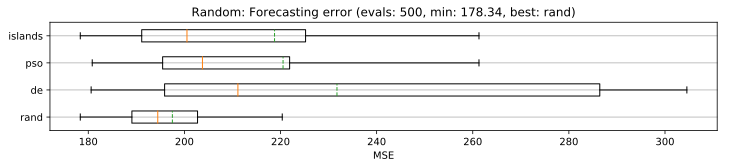

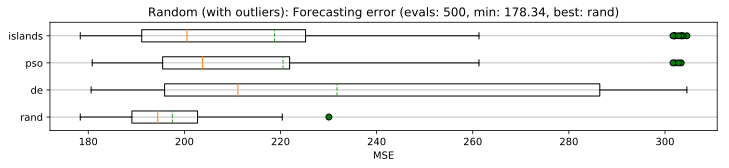

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column = "cvMseMean"
# column = "holdoutMse"
file_name = "current"

minFitness = 5000
minMethod = ""

randFname = "randRuns.csv"
psoFname = "psoRuns.csv"
deFname = "deRuns.csv"
fpath = "../models/NarxModelSearch/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands340evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga8Islands250evals/logs/"
# fpath = "../models/NarxModelSearch/runs/ga5IslandsDistinct/logs/"
# fpath = "../models/NarxModelSearch/runs/ga3Islands3Agents20/logs/"

rand = True
pso = True
de = True
island = True
concurrent_island = True

# steps = 5000
steps = 500

# TODO: make case for Island

if rand:
    randDf = pd.read_csv(fpath + randFname)
    randDf["datetime"] = pd.to_datetime(randDf["datetime"])
    if len(randDf) > 0:
        rand = True
#     steps = min(steps, min(len(randDf)))
if pso:
    psoDf = pd.read_csv(fpath + psoFname)
    psoDf["datetime"] = pd.to_datetime(psoDf["datetime"])
#     steps = min(steps, min(len(psoDf)))
    if len(psoDf) > 0:
        pso = True   
if de:
    deDf = pd.read_csv(fpath + deFname)
    deDf["datetime"] = pd.to_datetime(deDf["datetime"])
#     steps = min(steps, min(len(deDf)))
    if len(deDf) > 0:
        de = True
        
if rand:
    steps = min(steps, len(randDf))
if pso:
    steps = min(steps, len(psoDf))
if de:
    steps = min(steps, len(deDf))

# steps = 2000   
steps = 500
    
if rand:
    randMseMin = getMinimizingArray(randDf.head(steps), column)
if pso:
    psoMseMin = getMinimizingArray(psoDf.head(steps), column)
if de:
    deMseMin = getMinimizingArray(deDf.head(steps), column)

rand = True
pso = True
de = True
island = True
concurrent_island = True

minMethod = "rand"
minFitness = min(randMseMin)
if min(deMseMin) < min(randMseMin):
    minMethod = "de"      
    minFitness = min(deMseMin)
if min(psoMseMin) < min(randMseMin):
    minMethod = "pso" 
    minFitness = min(psoMseMin)

islandArray = np.empty(steps)
islandArray = []
islandArrayFull = []
islandArrayFull2 = []
if island:
#     islandArray = getMinimisingIslandArray(psoMseMin, deMseMin, steps)
    islandArray = getMinimisingIslandArray2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), steps)
#     islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull2 = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
#     islandArrayFull = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull2 = getIslandArrayFull2(psoMseMin, deMseMin, randMseMin, steps)
#     islandArrayFull = getIslandArrayFull2(np.array(psoDf[column].head(steps)), np.array(deDf[column].head(steps)), np.array(randDf[column].head(steps)), steps)
    islandArrayFull3 = getMinimizingArray2(islandArrayFull2)
    if len(islandArray) > 0:
        island = True    

#     minFitness = min(min(islandArray), min(randMseMin))
#     minMethod = "rand"
#     if min(islandArray) < min(randMseMin):
#         minMethod = "islands"
   
    
red_square = dict(markerfacecolor='g', marker='o')

# figure_size = (16, 3)
figure_size = (12, 2)

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random: Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=False, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'Boxplot.png', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=figure_size)
ax.set_xlabel("MSE")
ax.set_title('Random (with outliers): Forecasting error (evals: {}, min: {}, best: {})'.format(steps, round(minFitness, 2), minMethod))
ax.yaxis.grid(True)
# ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, flierprops=red_square, showmeans=True, meanline=True);
ax.boxplot([randDf[column][:steps], deDf[column][:steps], psoDf[column][:steps], islandArrayFull2], vert=False, showfliers=True, flierprops=red_square, showmeans=True, meanline=True);
plt.yticks(range(1, 5), ["rand", "de", "pso", "islands"]);
# plt.yticks(range(1, 5), ["rand", "de", "pso"]);
plt.savefig(file_name + 'OutliersBoxplot.png', bbox_inches='tight')